<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12316 non-null float64
Administrative_Duration    12316 non-null float64
Informational              12316 non-null float64
Informational_Duration     12316 non-null float64
ProductRelated             12316 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12316 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes:

C:\Users\KARTHIK\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\KARTHIK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\KARTHIK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\KARTHIK\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Cluster membership
6    5927
3    3120
5    1544
7     934
2     343
1     245
4     129
0      74
Name: Cluster_ID, dtype: int64


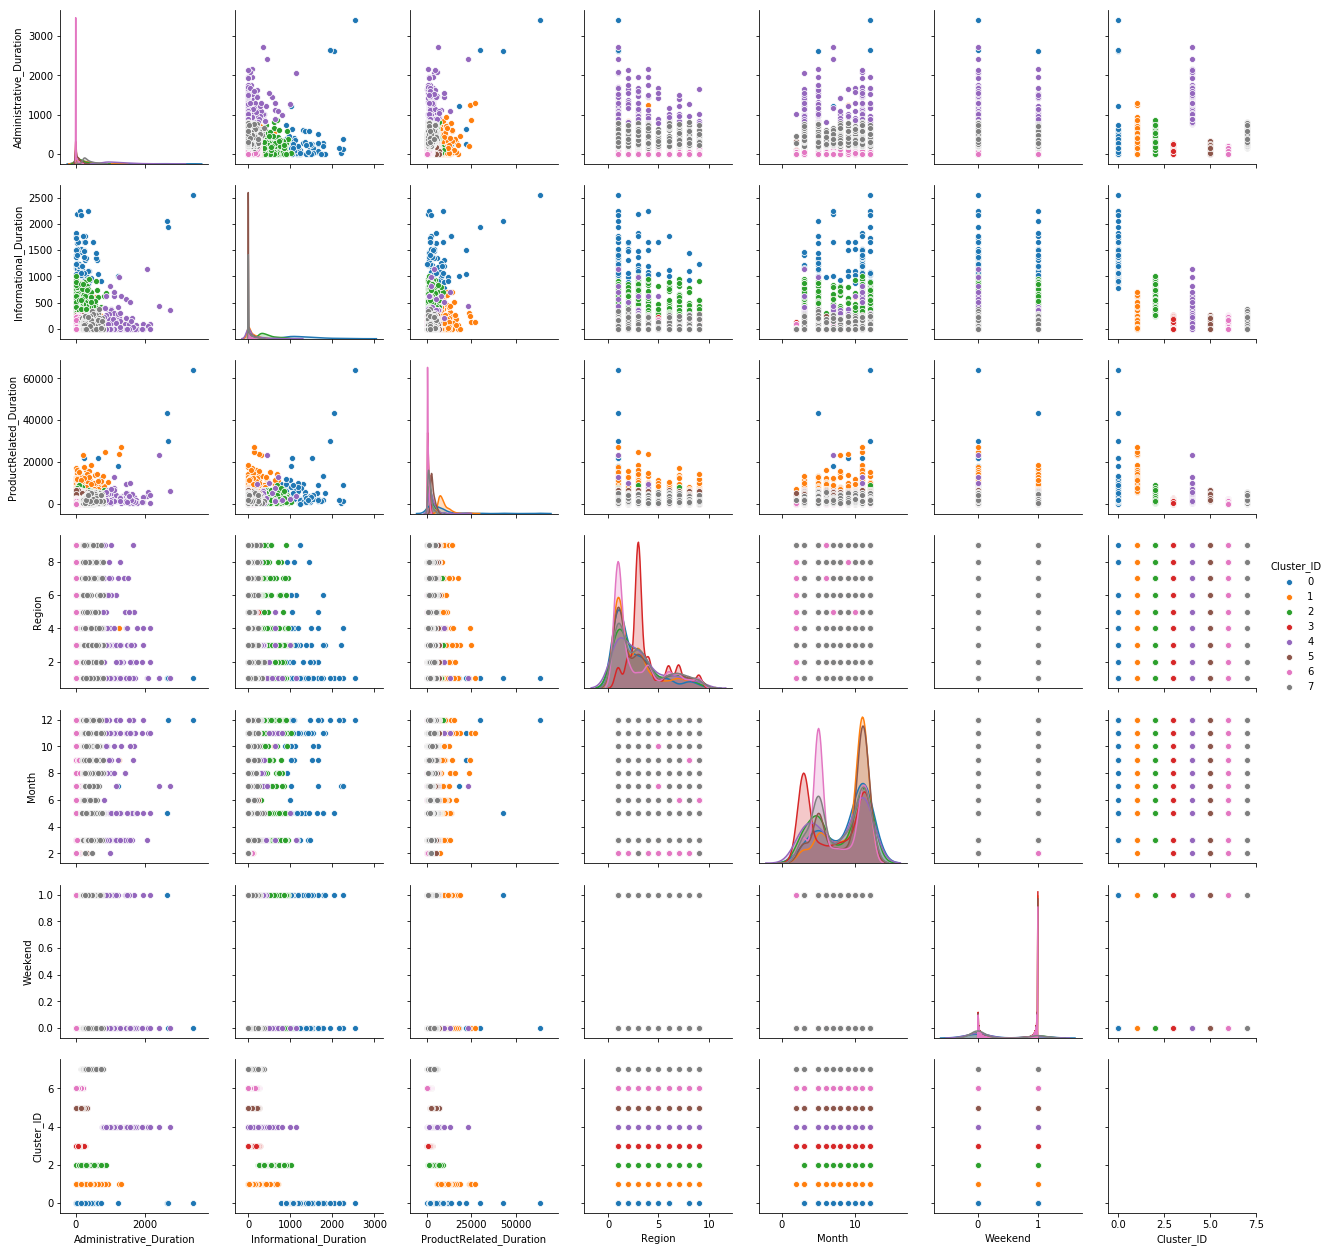

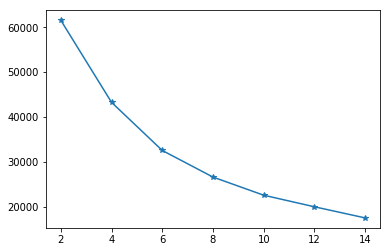

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
('Silhouette score for k=2', 0.30518703814938086)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
('Silhouette score for k=4', 0.3006797242596721)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
('Silhouette score for k=6', 0.33253112278457647)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
('Silhouette score for k=8', 0.3641639395088992)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#PRE-PROCESSING
df = pd.read_csv('online_shoppers_intention.csv')
print(df.info())
df.dropna(how='any',inplace=True)
print(df.info())
df['Administrative_Duration']=df['Administrative_Duration'].replace(-1,0)
df['Informational_Duration']=df['Informational_Duration'].replace(-1,0)
df['ProductRelated_Duration']=df['ProductRelated_Duration'].replace(-1,0)
Month_map={'Feb':2,'Mar':3,'May':5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
df['Month']=df['Month'].map(Month_map)
df['Month'] = df['Month'].astype(int)
print(df.info())
df.to_csv(r'C:\Users\KARTHIK\Desktop\shoppers_preprocessed.csv')


#CLUSTERING
# take 3 variables and drop the rest
df2 = df[['Administrative_Duration','Informational_Duration','ProductRelated_Duration','Region','Month','Weekend']]

# convert df2 to matrix
X = df2.as_matrix()

# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# random state, we will use 42 instead of 10 for a change
rs = 42

from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
test=KPrototypes(n_clusters=8, init='Huang') # n_cluster is the parameter to set the number of clusters.
y=test.fit_predict(X, categorical=[3,4,5]) # Here categorical should be set with the indices of categorical variables. In this dataset, workclass is the only categorical variable. Note: Index starts with 0.  
df2['Cluster_ID'] = y
# how many records are in each cluster
print("Cluster membership")
print(df2['Cluster_ID'].value_counts())
    
# pairplot the cluster distribution.
cluster_g = sns.pairplot(df2, hue='Cluster_ID')
plt.show()

# list to save the clusters and cost
clusters = []
inertia_vals = []

# this whole process should take a while
for k in range(2, 15, 2):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit(X)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)
    
# plot the inertia vs K values
plt.plot(range(2,15,2), inertia_vals, marker='*')
plt.show()


from sklearn.metrics import silhouette_score
print(clusters[0])
print("Silhouette score for k=2", silhouette_score(X, clusters[0].predict(X)))

print(clusters[1])
print("Silhouette score for k=4", silhouette_score(X, clusters[1].predict(X)))

print(clusters[2])
print("Silhouette score for k=6", silhouette_score(X, clusters[2].predict(X)))

print(clusters[3])
print("Silhouette score for k=8", silhouette_score(X, clusters[3].predict(X)))

print(clusters[4])
print("Silhouette score for k=10", silhouette_score(X, clusters[4].predict(X)))
